### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv('HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [8]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


In [9]:
#1. What is the percentage of churn by salary bucket

In [10]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

In [11]:
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [12]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [13]:
salary_percent

,salary,left,0
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


In [14]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

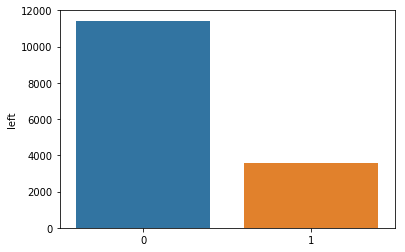

In [15]:
sn.barplot( hr_left_df.index, hr_left_df.left )

In [16]:
obs = pd.crosstab(hr_df.salary, hr_df.left,margins=True)

In [17]:
import scipy.stats as stats

stats.chi2_contingency(observed=obs)
# H0 : no effect
# H1 : effect

#Conclusion : Salary bracket/pay scale is effecting the attrition
# Employees from the Lower salary baracket are more likely to leave

(381.22504706621066,
 3.032930523747683e-79,
 6,
 array([[  942.49189946,   294.50810054,  1237.        ],
        [ 5574.18814588,  1741.81185412,  7316.        ],
        [ 4911.31995466,  1534.68004534,  6446.        ],
        [11428.        ,  3571.        , 14999.        ]]))

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


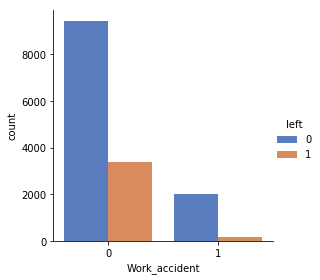

In [18]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")


In [19]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [20]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


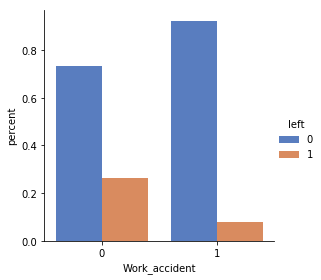

In [21]:
sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

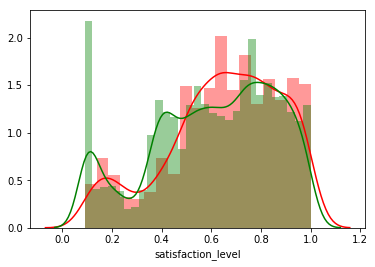

In [22]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

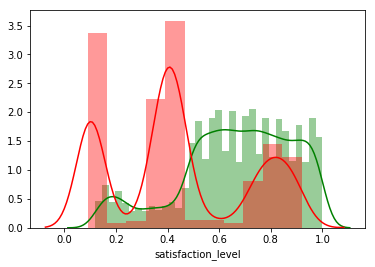

In [23]:
#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

It can be noted, large number of people who had lower satisfaction levels, have left the company. 
Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in 
at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

In [24]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479516

In [25]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

0.21709425554771716

In [26]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.44009801176140917

In [27]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.2638964784854295

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying   

In [28]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

The test establishes that the average satisfaction levels are different.

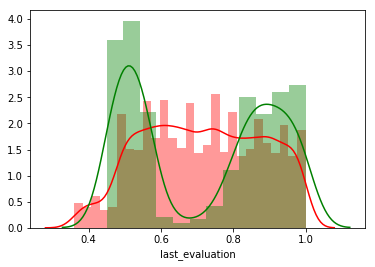

In [29]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back. That seems interesting.

In [30]:
# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


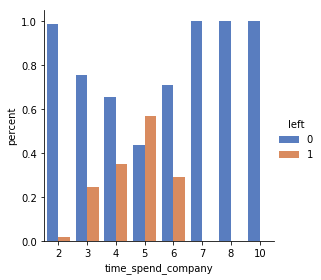

In [31]:
sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


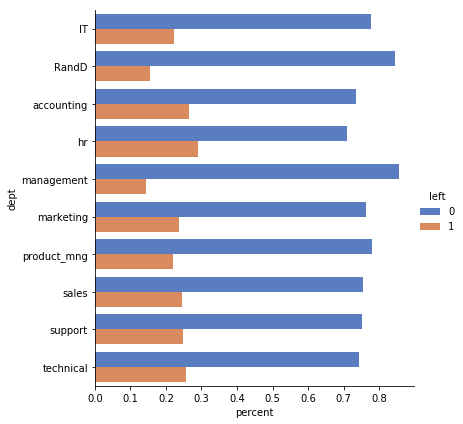

In [32]:
# 8. Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

In [33]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


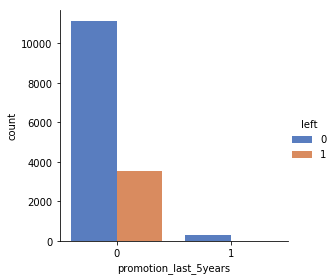

In [34]:
sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


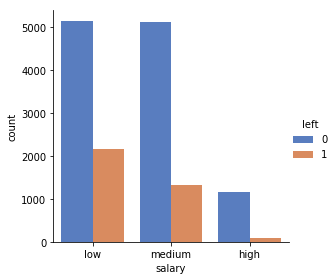

In [35]:
#10.  How Salary is influencing attrition decisions?
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

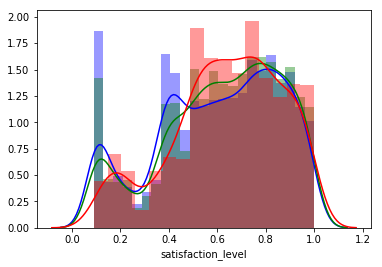

In [36]:
#11. Does higher salary lead to higher satisfaction level?
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


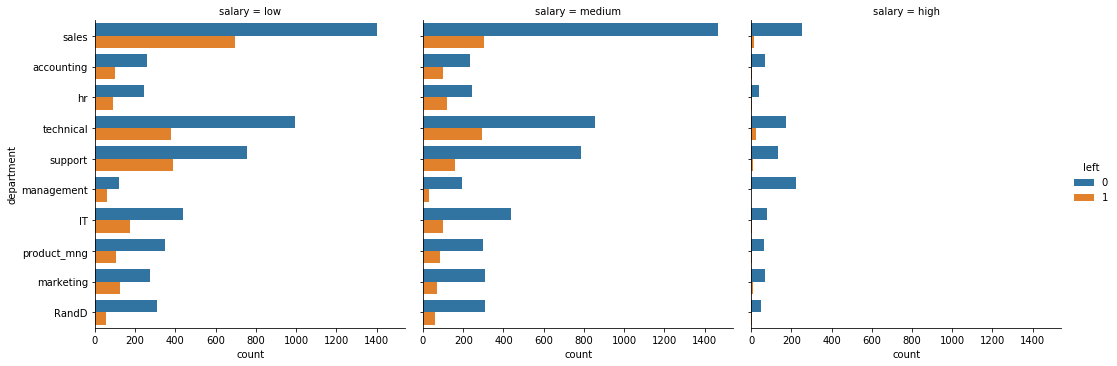

In [37]:
#12.How salaries across departments are related to attrition?
sn.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

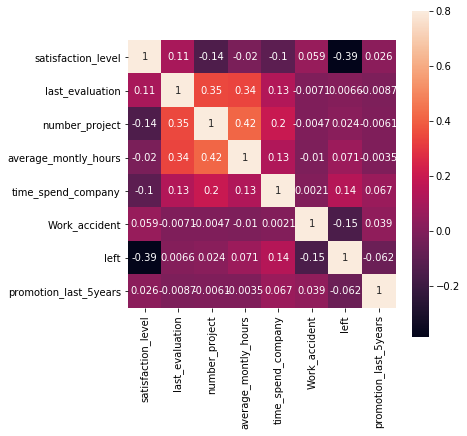

In [38]:
# 13. Lets check corrleation between Variables
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

# Some key observations:
Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects. <br>
Evaluation score is positively correlated with spending more montly hours and number of projects. <br>
As satisfaction level reduces, people tend to leave company <br>

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [39]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [40]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [42]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [43]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [44]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [45]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [46]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split(hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42)

C:\Users\sunitprasad\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
train_X.head()

,Work_accident_1,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,satisfaction_level,time_spend_company
9838,0,188,0,0,0,0,0,1,0,0,0,0.61,3,0,1,0,1.00,4
7689,0,196,0,0,0,0,0,0,0,0,1,0.78,4,0,0,0,0.16,5
6557,0,175,1,0,0,0,0,0,0,0,0,0.80,3,0,0,1,0.80,2
6872,0,112,0,1,0,0,0,0,0,0,0,0.86,4,0,0,1,0.66,6
820,0,284,0,0,0,0,0,0,0,0,1,0.93,7,0,1,0,0.11,4


In [49]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y) 
# Training features or X vars and Training Dependent Variable

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
coeff = pd.Series(logreg.coef_[0].round(4))

feature_columns = pd.Series(feature_columns)

pd.concat([feature_columns,coeff],axis=1)

,0,1
0,Work_accident_1,-1.4927
1,average_montly_hours,0.0050
2,department_RandD,-0.5708
3,department_accounting,0.0930
4,department_hr,0.3589
5,department_management,-0.3624
6,department_marketing,0.1305
7,department_product_mng,0.0238
8,department_sales,0.0758
9,department_support,0.1349


In [54]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.492662273494587),
 ('average_montly_hours', 0.00497563736530884),
 ('department_RandD', -0.5707635761407588),
 ('department_accounting', 0.09300305900754494),
 ('department_hr', 0.35887713528557824),
 ('department_management', -0.36238815536107627),
 ('department_marketing', 0.13047433433399505),
 ('department_product_mng', 0.023809201215293938),
 ('department_sales', 0.0758418051023502),
 ('department_support', 0.1349394309914213),
 ('department_technical', 0.19545538155206246),
 ('last_evaluation', 0.5925856573690121),
 ('number_project', -0.3037334962620707),
 ('promotion_last_5years_1', -1.2172794133484774),
 ('salary_low', 1.8131726398256902),
 ('salary_medium', 1.3088619671071344),
 ('satisfaction_level', -4.10826751051314),
 ('time_spend_company', 0.26529824928293405)]

In [67]:
logreg.intercept_ #C

array([-1.53003338])

In [68]:
logreg.predict_proba(train_X) # Predicted probs for training data

array([[0.91328566, 0.08671434],
       [0.60895025, 0.39104975],
       [0.95748072, 0.04251928],
       ...,
       [0.89227938, 0.10772062],
       [0.74983236, 0.25016764],
       [0.83398079, 0.16601921]])

In [72]:
logreg.predict(test_X) # Predicted probs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [83]:
hr_test_pred

,actual,predicted
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
8127,0,0
3017,0,0
3087,0,1
6425,0,0
2250,0,1


In [84]:

hr_test_pred = hr_test_pred.reset_index()

In [85]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
2544,12478,1,0
2305,5707,0,0
995,11209,0,1
1313,10538,0,0
1199,12367,1,0
2480,2168,0,0
1790,8360,0,0
1756,9534,0,0
1937,10245,0,0
2290,5359,0,0


In [86]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,hr_test_pred.predicted, [1,0] )
cm

#    0   1
# 0  225 481
# 1  175 2119
# TN : 225 ; TP : 2119 : Accuracy, Specificity, Sensitivity(Recall) and Precision
# FP : 481 ; FN : 175

array([[ 225,  481],
       [ 175, 2119]], dtype=int64)

In [87]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

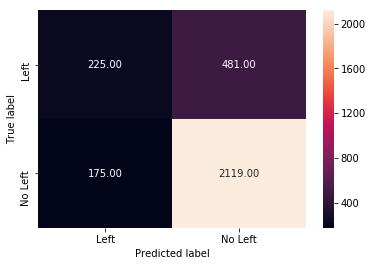

In [88]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [89]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 ) # TP+TN/TotalValues

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [90]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba(test_X[:1]))

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97203472 0.02796528]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [91]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [92]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [93]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [94]:
hr_test_pred

,index,actual,predicted,Left_0,Left_1
0,6723,0,0,0.972035,0.027965
1,6473,0,0,0.917792,0.082208
2,4679,0,0,0.770442,0.229558
3,862,1,0,0.523038,0.476962
4,7286,0,0,0.975843,0.024157
5,8127,0,0,0.722851,0.277149
6,3017,0,0,0.985596,0.014404
7,3087,0,1,0.130254,0.869746
8,6425,0,0,0.769714,0.230286
9,2250,0,1,0.398617,0.601383


In [95]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
# actual values and P(left == 1)
round( float( auc_score ), 2 )

0.81

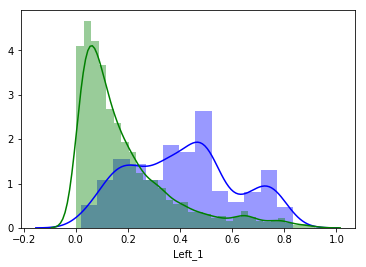

In [96]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

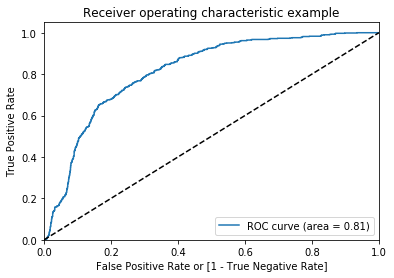

In [97]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [116]:
thresholds = pd.Series(thresholds[0:10])
fpr = pd.Series(fpr[0:10])
tpr = pd.Series(tpr[0:10])

dat = pd.concat([fpr,tpr,thresholds],axis=1)

dat.columns = ["1-Specificity","Sensitivity","Threshold"]


Specificity = 1 - fpr

dat["Sen+Spe"] = tpr + Specificity
dat["Sen+Spe"] == dat["Sen+Spe"].max()

dat

,1-Specificity,Sensitivity,Threshold,Sen+Spe
0,0.000000,0.0,1.919054,1.000000
1,0.000872,0.0,0.919054,0.999128
2,0.001308,0.0,0.900575,0.998692
3,0.001744,0.0,0.886059,0.998256
4,0.002180,0.0,0.880014,0.997820
5,0.002616,0.0,0.879338,0.997384
6,0.003051,0.0,0.872333,0.996949
7,0.003487,0.0,0.869746,0.996513
8,0.003923,0.0,0.861933,0.996077
9,0.004359,0.0,0.858803,0.995641


In [105]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

C:\Users\sunitprasad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


In [106]:
round( float( cutoff_prob ), 2 )

1.92

In [ ]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 1.92 else 0 )

In [ ]:
hr_test_pred[0:10]

In [ ]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [117]:
# 1. Calculate sen,spe,precision, accuracy
# 2. Build the equation
# 3. Write up the business conclusion
# 4. Decile analysis